# Proyek Analisis Data: Bike Sharing
- **Nama:** Moh. Wahyu Abrory
- **Email:** wahyuabrory@gmail.com
- **ID Dicoding:** oudsateen

## Menentukan Pertanyaan Bisnis

- 1 Bagaimana perkembangan peminjaman sepeda selama satu tahun terakhir? Apakah terdapat tren kenaikan atau penurunan yang signifikan?
- 2 Pada musim apa terjadi jumlah peminjaman sepeda paling sedikit? Dan pada musim apa terjadi jumlah peminjaman sepeda paling banyak?
- 3 Bagaimana variabel-variabel seperti workday, day_of_week, dan holiday mempengaruhi pola peminjaman sepeda? Apakah ada perbedaan yang signifikan pada hari kerja, hari dalam seminggu, atau hari libur?
- 4 Bagaimana cuaca dan musim mempengaruhi tingkat peminjaman sepeda? Apakah terdapat preferensi tertentu terkait kondisi cuaca atau musim tertentu?
- 5 Apakah terdapat korelasi antara kecepatan suhu (*temperature*) dengan total peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah data yang terduplikasi : ", day_df.duplicated().sum())

Jumlah data yang terduplikasi :  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print('Jumlah data yang terduplikasi : ', hour_df.duplicated().sum())

Jumlah data yang terduplikasi :  0


### Cleaning Data

In [12]:
del hour_df

kolom `instant` dirasa tidak memberikan informasi apapun maka tidak diperlukan

In [13]:
day_df.drop(['instant'], axis=1, inplace=True)


Mengubah beberapa nama kolom agar lebih mudah dipahami dan dibaca

In [14]:
day_df.rename(columns={
    'dteday' : 'dateday',
    'mnth' : 'month',
    'yr' : 'year',
    'cnt' : 'count',
    'weathersit' : 'weather_condition',
    'hum' : 'humidity',
    'weekday' : 'day_of_week',
    'temp' : 'temperature',
    'atemp' : 'feels_like_temperature'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temperature,feels_like_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah beberapa tipe data kolom agar sesuai dengan data yang ada, misalnya kolom `season` dan `weather` yang seharusnya bertipe kategori.

In [15]:
day_df['day_of_week'] = day_df['day_of_week'].map({
    0: 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'
})

day_df['month'] = day_df['month'].map({
    1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June',
    7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'
})

day_df['season'] = day_df['season'].map({
    1 : 'Winter', 2 : 'Spring', 3 : 'Summer', 4 : 'Fall'
})

day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear/ Few clouds',
    2: 'Mist/ Cloudy',
    3: 'Snow/ Rain'
})

day_df['year'] = day_df['year'].map({
    0 : '2011', 1 : '2012'
})

day_df['holiday'] = day_df['holiday'].map({
    0 : 'No', 1 : 'Yes'
})

day_df['workingday'] = day_df['workingday'].map({
    0 : 'No', 1 : 'Yes'
})

day_df.head()

,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temperature,feels_like_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,No,Saturday,No,Mist/ Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,No,Sunday,No,Mist/ Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear/ Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear/ Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear/ Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nilai `temperature`, `feelslike`, `humidity`, `windspeed` agar lebih familiar untuk dimengerti.

In [16]:
day_df['temperature'] = day_df['temperature']*41
day_df['feels_like_temperature'] = day_df['feels_like_temperature']*50
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

Mengubah beberapa tipe data agar memudahkan untuk dianalisis

In [17]:
# Mengubah tipe data dateday menjadi datetime
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

# Mengubah tipe data menjadi kategori
day_df['month'] = day_df.month.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['day_of_week'] = day_df.day_of_week.astype('category')
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')

day_df.head()

,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temperature,feels_like_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,No,Saturday,No,Mist/ Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,January,No,Sunday,No,Mist/ Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear/ Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear/ Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear/ Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
day_df.to_csv("dashboard/bikeshare_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_df.dtypes

dateday                   datetime64[ns]
season                          category
year                            category
month                           category
holiday                         category
day_of_week                     category
workingday                      category
weather_condition               category
temperature                      float64
feels_like_temperature           float64
humidity                         float64
windspeed                        float64
casual                             int64
registered                         int64
count                              int64
dtype: object

#### Describe()

In [20]:
day_df.describe(include='all')

,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temperature,feels_like_temperature,humidity,windspeed,casual,registered,count
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,August,No,Monday,Yes,Clear/ Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dari gambaran parameter statistik yang telah disajikan, dapat disimpulkan bahwa mayoritas data yang dikumpulkan berasal dari tahun 2012, dengan rata-rata tanggal 2012-01-01, dengan rentang suhu historis terendah berkisar antara 2.42°C hingga 35.32°C. Rata-rata suhu pada rentang ini mencapai 20.3°C, dan kondisi grafik yang paling umum adalah `Clear/ Few Clouds` sebanyak 463 kali. Informasi ini memberikan gambaran bahwa grafik cenderung cerah, menciptakan suasana yang ideal untuk kegiatan bersepeda.

#### Groupby()

##### 1 [Musim]

In [21]:
day_df.groupby(by='season').agg({
    'count' : ['sum', 'min', 'max']
})

C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\2851874866.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


count            
            sum   min   max
season                     
Fall     841613    22  8555
Spring   918589   795  8362
Summer  1061129  1115  8714
Winter   471348   431  7836

Dari data yang disajikan, dapat disimpulkan bahwa peminjaman sepeda mencapai puncaknya selama musim gugur (`Fall`), sementara jumlah peminjaman terendah terjadi pada musim salju (`Spring`). Hal ini menunjukkan bahwa musim memiliki dampak yang signifikan terhadap tingkat peminjaman sepeda, dengan musim gugur menjadi puncak aktivitas peminjaman, sementara musim salju menunjukkan tingkat peminjaman yang lebih rendah.

##### 2 [Musim dan grafik]

In [22]:
day_df.groupby(by=['season', 'weather_condition']).agg({
    'count' : 'sum'
})


C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\1458583793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['season', 'weather_condition']).agg({


count
season weather_condition        
Fall   Clear/ Few clouds  519487
       Mist/ Cloudy       302510
       Snow/ Rain          19616
Spring Clear/ Few clouds  626986
       Mist/ Cloudy       288096
       Snow/ Rain           3507
Summer Clear/ Few clouds  799443
       Mist/ Cloudy       250679
       Snow/ Rain          11007
Winter Clear/ Few clouds  312036
       Mist/ Cloudy       155573
       Snow/ Rain           3739

Berdasarkan data yang telah disajikan, dapat ditarik beberapa pemahaman, yaitu bahwa aktivitas peminjaman sepeda cenderung meningkat saat grafik sedang cerah, tidak peduli pada musim apa pun. Hal ini dapat diamati dari informasi yang tertera di atas, bahwa meskipun saat musim salju, namun ketika grafik cerah, minat masyarakat untuk meminjam sepeda tetap tinggi.

##### 3 [Bulan]

In [23]:
day_df.groupby(by='month').agg({
    'count' : ['sum', 'min', 'max']
})

C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\927101605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count            
              sum   min   max
month                        
April      269094   795  7460
August     351194  1115  7865
December   211036   441  6606
February   151352  1005  5062
January    134933   431  4521
July       344948  3285  8173
June       346342  3767  8120
March      228920   605  8362
May        331686  2633  8294
November   254831  1495  6852
October    322352    22  8156
September  345991  1842  8714

Menurut data diatas, bisa disimpulkan bahwa peminjaman sepeda terjadi paling banyak pada bulan `Agustus`, diikuti dengan `Juni`, lalu `September`. Lalu terdapat kenaikan jumlah peminjaman sepeda dari bulan januari hingga bulan `Agustus`, diikuti penurunan di bulan `November` dan `Desember`. Pola ini sesuai dengan fluktuasi grafik dan aktivitas rekreasi sepanjang tahun.


##### 4 [Hari]

In [24]:
day_df.groupby(by=['day_of_week']).agg({
    'count' : ['sum', 'min', 'max']
})


C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\1474716469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['day_of_week']).agg({


count            
                sum   min   max
day_of_week                    
Friday       487790  1167  8362
Monday       455503    22  7525
Saturday     477807   627  8714
Sunday       444027   605  8227
Thursday     485395   431  7804
Tuesday      469109   683  7767
Wednesday    473048   441  8173

Berdasarkan dari pengelompokkan diatas, dapat diambil kesimpulan bahwa, Hari dengan peminjaman tertinggi adalah `Sabtu`, disusul hari `Jum'at`, `Minggu`, `Rabu`, `Kamis`, `Selasa`, lalu `Senin`

In [25]:
day_df.groupby(by='holiday').agg({
    'count' : ['sum', 'min', 'max']
})

C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\2429281067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count            
             sum   min   max
holiday                     
No       3214244    22  8714
Yes        78435  1000  7403

Bisa disimpulkan bahwa peminjaman lebih sering dilakukan pada `hari kerja` bukan `hari libur`.

#### Top 10 Peminjaman Sepeda berdasarkan Jumlah Peminjam Sepeda

In [26]:
day_df.sort_values(by='count', ascending=False).head(10)

,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temperature,feels_like_temperature,humidity,windspeed,casual,registered,count
623,2012-09-15,Summer,2012,September,No,Saturday,No,Clear/ Few clouds,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
637,2012-09-29,Fall,2012,September,No,Saturday,No,Clear/ Few clouds,22.242500,26.51480,54.2917,15.249468,2589,5966,8555
630,2012-09-22,Summer,2012,September,No,Saturday,No,Clear/ Few clouds,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
447,2012-03-23,Spring,2012,March,No,Friday,Yes,Mist/ Cloudy,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
504,2012-05-19,Spring,2012,May,No,Saturday,No,Clear/ Few clouds,24.600000,28.34540,45.6250,5.626325,3410,4884,8294
617,2012-09-09,Summer,2012,September,No,Sunday,No,Clear/ Few clouds,25.010000,28.94625,54.7500,15.041232,2570,5657,8227
571,2012-07-25,Summer,2012,July,No,Wednesday,Yes,Clear/ Few clouds,29.690847,32.70270,45.0000,11.041600,1383,6790,8173
629,2012-09-21,Summer,2012,September,No,Friday,Yes,Clear/ Few clouds,24.565847,28.59855,66.8750,10.333343,1250,6917,8167
643,2012-10-05,Fall,2012,October,No,Friday,Yes,Clear/ Few clouds,25.215000,29.00935,62.7500,7.125450,1516,6640,8156
518,2012-06-02,Spring,2012,June,No,Saturday,No,Clear/ Few clouds,23.916653,28.31440,54.9167,12.499654,2795,5325,8120


Pada hari-hari seperti `Jumat` dan `Sabtu`, terutama ketika grafik `cerah` dengan suhu sekitar 25°C, terjadi peningkatan signifikan dalam peminjaman sepeda. Fenomena ini lebih menonjol selama `musim gugur` dan `musim panas`. Berbagai faktor ini secara nyata memengaruhi tingkat permintaan peminjaman sepeda.

#### Korelasi

In [27]:
day_df.corr(numeric_only=True)

,temperature,feels_like_temperature,humidity,windspeed,casual,registered,count
temperature,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
feels_like_temperature,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


- Terdapat relasi yang kuat antara `suhu` dengan `suhu seperti`
- Terdapat relasi yang cukup kuat atara `suhu` dengan `count` (banyaknya orang yang meminjam sepeda)
- Terdapat relasi yang kuat antara pengguna yang terdaftar atau `registered` dengan `count`
- Tidak ada relasi antara `humidity`, `windspeed` dengan `count`

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan peminjaman sepeda selama satu tahun terakhir? Apakah terdapat tren kenaikan atau penurunan yang signifikan?

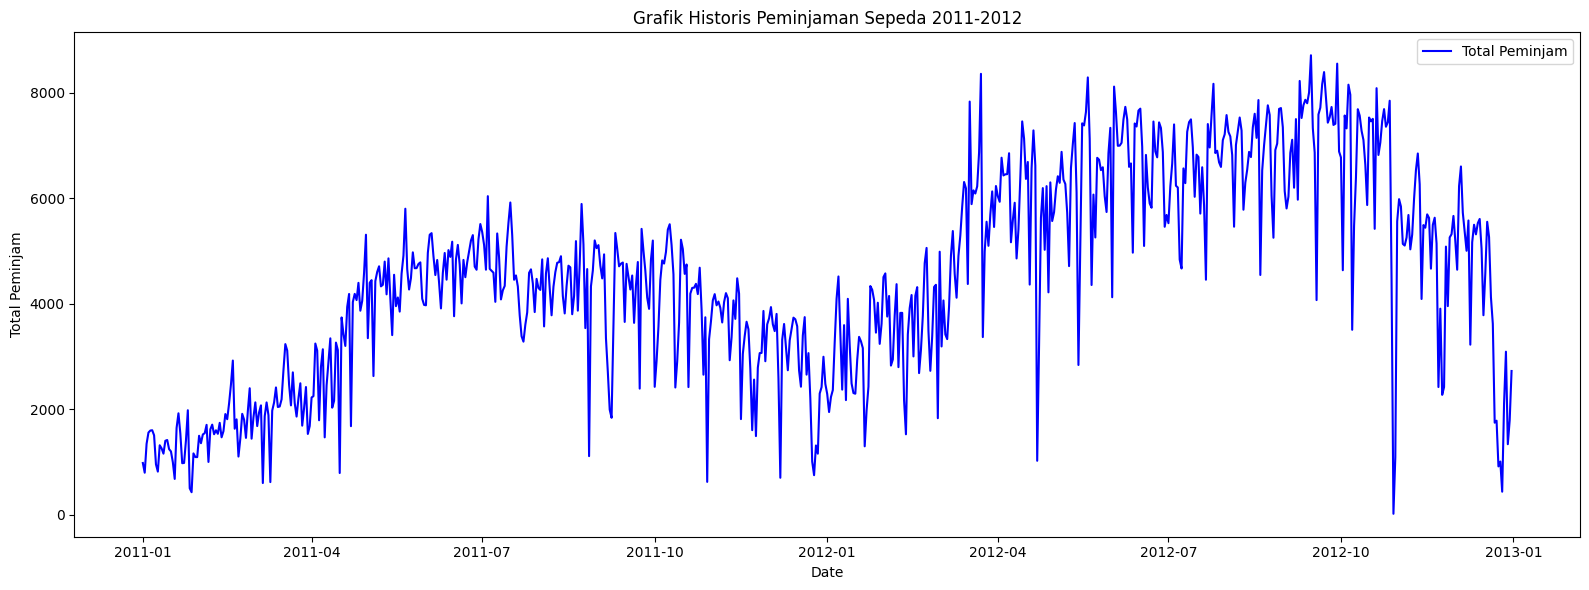

In [28]:
plt.figure(figsize=(16, 6))

sns.lineplot(x='dateday', y='count', data=day_df, color='blue', label='Total Peminjam', errorbar=None)

plt.xlabel('Date')
plt.ylabel('Total Peminjam')
plt.title('Grafik Historis Peminjaman Sepeda 2011-2012')

plt.tight_layout()
plt.show()

untuk membuat chart diatas menjadi lebih mudah dibaca, mari kita ubah time series nya dari hari ke bulan

In [29]:
peminjam_bulanan_df = day_df.resample('M', on='dateday').agg({'count' : 'sum'})

peminjam_bulanan_df.head(5)

,count
dateday,
2011-01-31,38189
2011-02-28,48215
2011-03-31,64045
2011-04-30,94870
2011-05-31,135821


In [30]:
peminjam_bulanan_df.index = peminjam_bulanan_df.index.strftime('%b-%y')

peminjam_bulanan_df.head(3)

,count
dateday,
Jan-11,38189
Feb-11,48215
Mar-11,64045


In [31]:
peminjam_bulanan_df = peminjam_bulanan_df.reset_index()

peminjam_bulanan_df.rename(columns={'dateday' : 'month-year'}, inplace=True)

peminjam_bulanan_df.head(3)

,month-year,count
0,Jan-11,38189
1,Feb-11,48215
2,Mar-11,64045


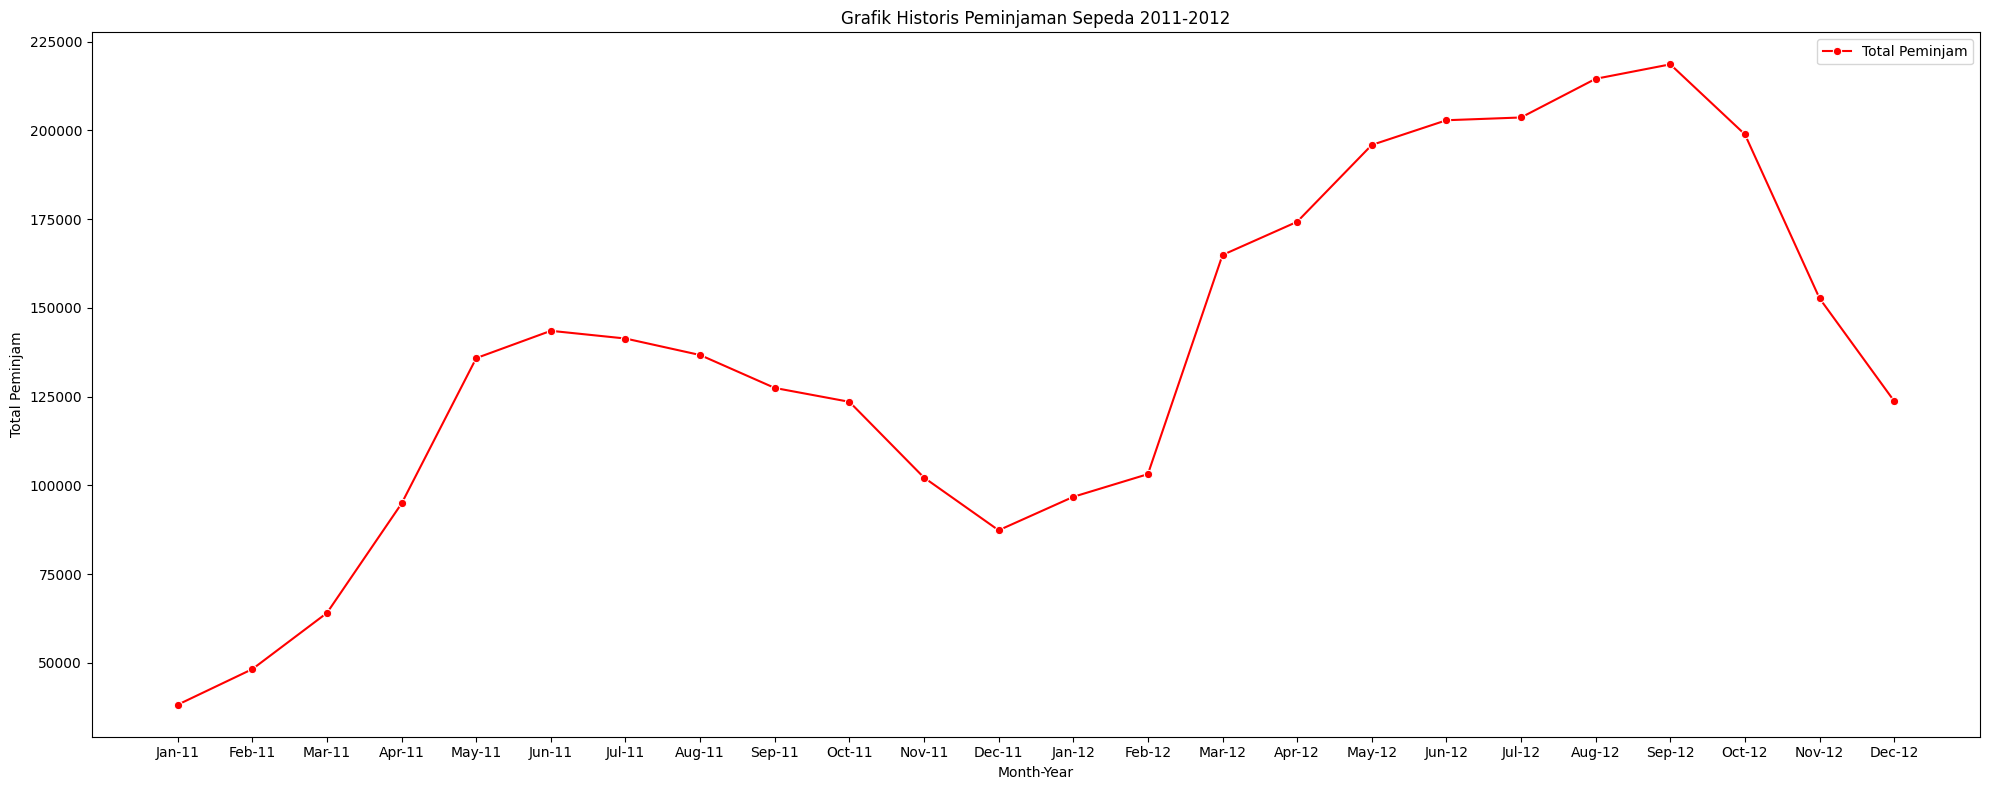

In [32]:
plt.figure(figsize=(20,8))

sns.lineplot(x="month-year", y="count", data=peminjam_bulanan_df, color='red', errorbar=None, label='Total Peminjam', marker='o')

plt.xlabel('Month-Year')
plt.ylabel('Total Peminjam')
plt.title("Grafik Historis Peminjaman Sepeda 2011-2012")

plt.tight_layout()
plt.show()

***Insight***
1. Total peminjaman tertingga sepeda pada tahun 2012 lebih besar dibandingkan dengan tahun 2011.
2. Terlihat pola tren peningkatan jumlah peminjaman sepeda dari awal tahun hingga pertengahan tahun dan menurun pada akhir tahun.

### Pertanyaan 2: Pada musim apa terjadi jumlah peminjaman sepeda paling sedikit? Dan pada musim apa terjadi jumlah peminjaman sepeda paling banyak?

In [33]:
peminjam_musim_df = day_df.groupby(by=['season', 'year']).agg({'count' : 'sum'})

peminjam_musim_df.head()

C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\3645927889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peminjam_musim_df = day_df.groupby(by=['season', 'year']).agg({'count' : 'sum'})


count
season year        
Fall   2011  326137
       2012  515476
Spring 2011  347316
       2012  571273
Summer 2011  419650

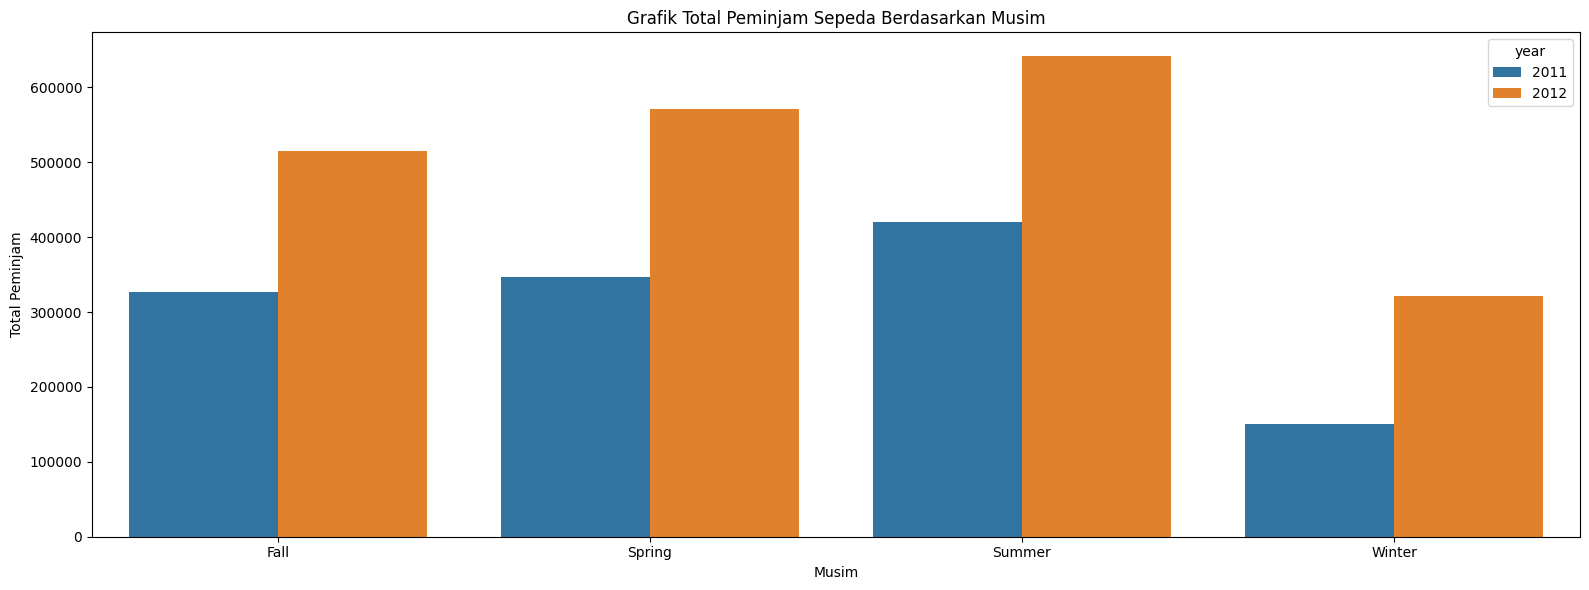

In [34]:
plt.figure(figsize=(16, 6)) 

sns.barplot(x='season', y='count', hue='year', data=peminjam_musim_df.reset_index(), errorbar=None)

plt.xlabel('Musim')
plt.ylabel('Total Peminjam')
plt.title('Grafik Total Peminjam Sepeda Berdasarkan Musim')

plt.tight_layout()
plt.show()

***Insight***
1. Pada musim `Spring` peminjaman sepeda paling sedikit
2. Pada musim `Fall` peminjaman sepeda paling banyak
3. Pada musim `Spring` peminjaman sepeda mengalami kenaikan yang cukup signifikan dari tahun 2011-2012

### Pertanyaan 3: Bagaimana variabel-variabel seperti workday, day_of_week, dan holiday mempengaruhi pola peminjaman sepeda? Apakah ada perbedaan yang signifikan pada hari kerja, hari dalam seminggu, atau hari libur?

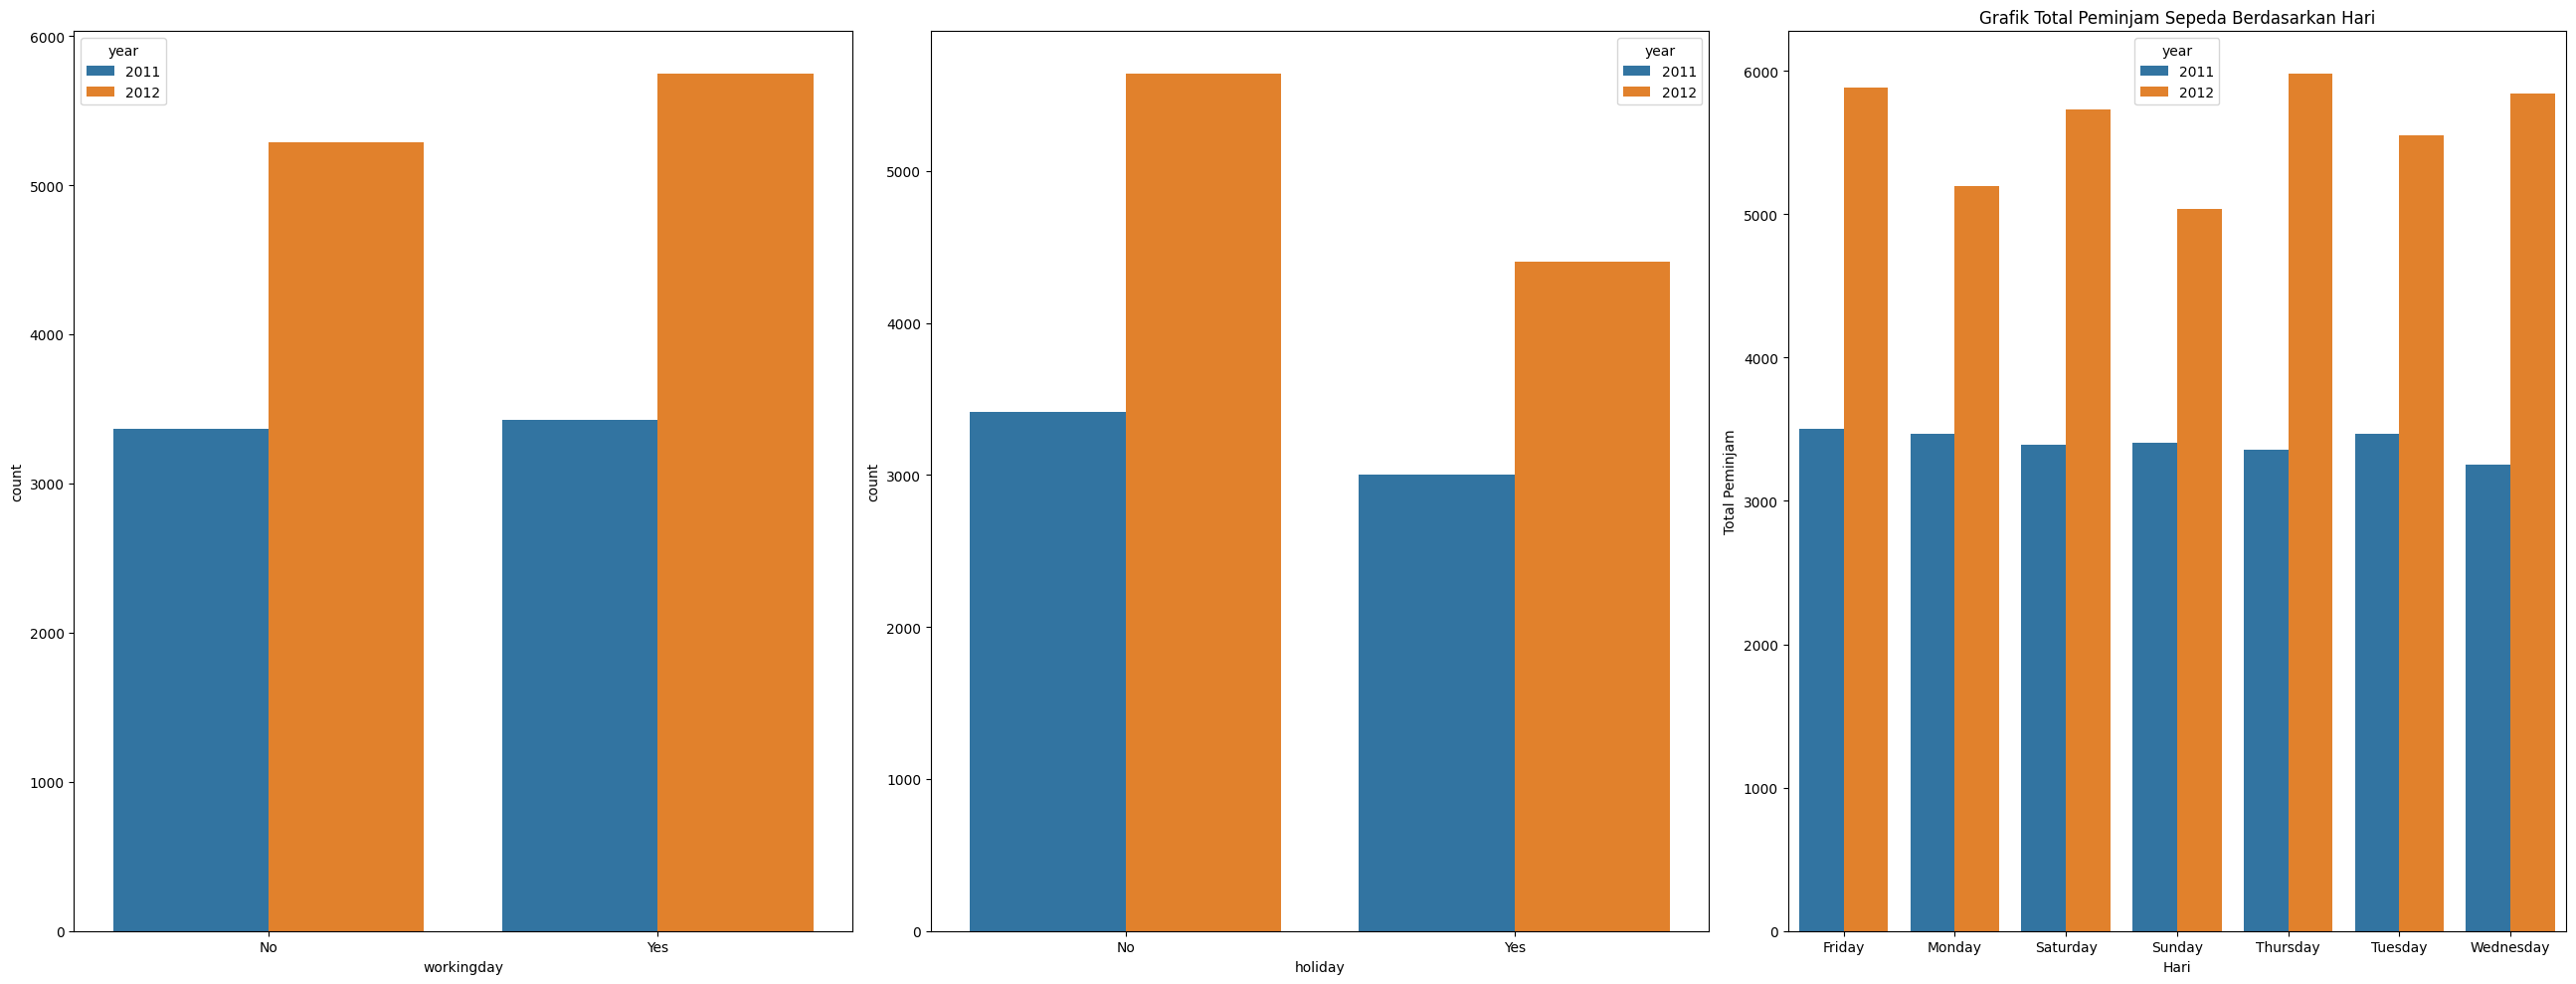

In [35]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(26, 10))

# workday
sns.barplot(x='workingday', y='count', hue='year', data=day_df, errorbar=None, ax=ax[0])

# holiday
sns.barplot(x='holiday', y='count', hue='year', data=day_df, errorbar=None, ax=ax[1])

# day of week
sns.barplot(x='day_of_week', y='count', hue='year', data=day_df, errorbar=None, ax=ax[2])

plt.xlabel('Hari')
plt.ylabel('Total Peminjam')
plt.title('Grafik Total Peminjam Sepeda Berdasarkan Hari')

plt.tight_layout()
plt.show()

***Insight***
1. Total peminjaman sepeda pada hari kerja lebih banyak dibandingkan hari libur
2. Pada hari kerja, peminjaman sepeda paling banyak terjadi pada hari `Jumat`. Sedangkan peminjaman sepeda paling sedikit terjadi pada hari `Senin`.
3. Pada hari kerja, orang cenderung meminjam sepeda pada hari-hari `non-kerja`, seperti `Sabtu` atau `Minggu`. Hal ini dapat terlihat dari grafik yang menunjukkan total peminjaman sepeda pada tahun 2011 seimbang antara hari kerja, sementara pada akhir pekan hanya terjadi pada `Sabtu` dan `Minggu`. Hasil ini mengindikasikan preferensi orang untuk meminjam sepeda terutama pada `akhir pekan`.

### Pertanyaan 4: Bagaimana cuaca dan musim mempengaruhi tingkat peminjaman sepeda? Apakah terdapat preferensi tertentu terkait kondisi cuaca atau musim tertentu?

In [36]:
musim_hari_df = day_df.groupby(by=['season', 'weather_condition']).agg({'count' : 'sum'})

C:\Users\abrory\AppData\Local\Temp\ipykernel_18856\4034559734.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  musim_hari_df = day_df.groupby(by=['season', 'weather_condition']).agg({'count' : 'sum'})


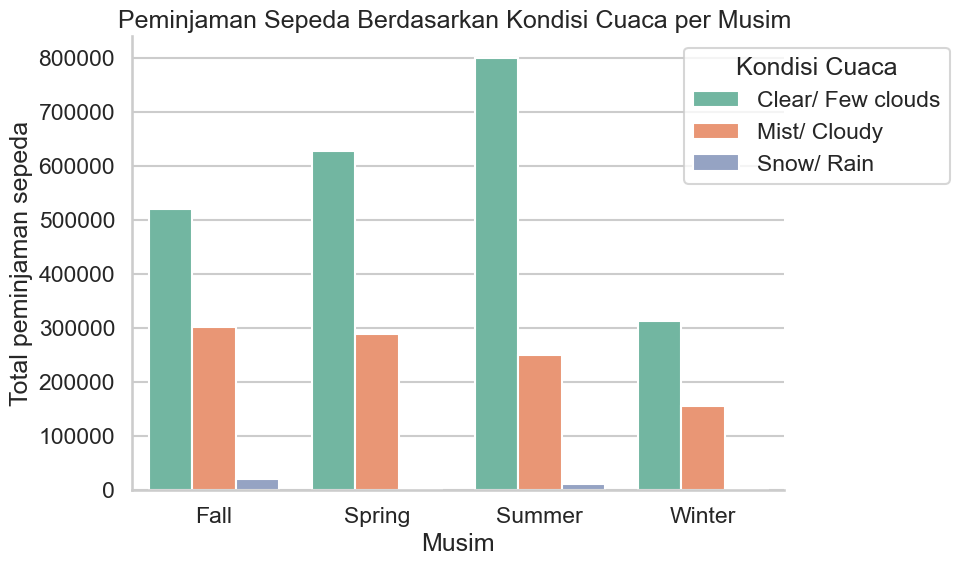

In [37]:
sns.set(style="whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', hue='weather_condition', data=musim_hari_df, palette='Set2', errorbar=None)

plt.xlabel('Musim')
plt.ylabel('Total peminjaman sepeda')
plt.title('Peminjaman Sepeda Berdasarkan Kondisi Cuaca per Musim ')
plt.legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1), loc='upper center')

sns.despine()

plt.tight_layout()
plt.show()

***Insight***
1. Peminjaman sepeda cenderung meningkat saat grafik sedang cerah, tidak peduli pada musim apa pun. Hal ini dapat diamati dari informasi yang tertera di atas, bahwa meskipun saat musim salju, namun ketika grafik cerah, minat masyarakat untuk meminjam sepeda tetap tinggi. Begitupun sebaliknya.

### Pertanyaan 5: Apakah terdapat korelasi antara kecepatan suhu (*temperature*) dengan total peminjaman sepeda?

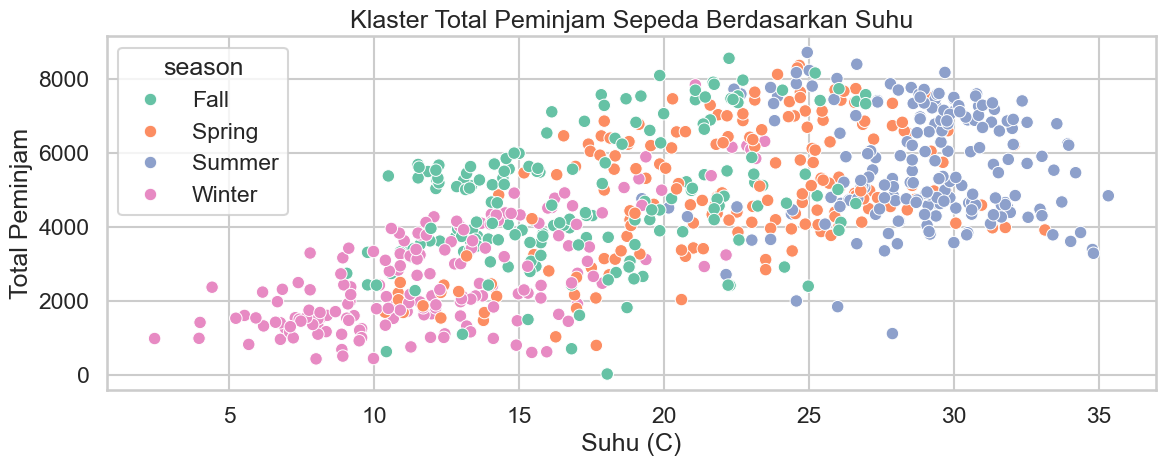

In [38]:
plt.figure(figsize=(12,5))

sns.scatterplot(x='temperature', y='count', data=day_df, hue='season', palette='Set2', )

plt.xlabel('Suhu (C)')
plt.ylabel('Total Peminjam')
plt.title("Klaster Total Peminjam Sepeda Berdasarkan Suhu") 

plt.tight_layout()
plt.show()


***Insight***
1. Ketika suhu rendah total peminjaman sepeda cenderung sedikit, sebaliknya jika suhu meningkat maka total peminjaman juga meningkat hal ini terjadi pada musim gugur. 
2. Dari sini terdapat `sweet-spot` dari suhu, ketika total peminjaman sepeda berada dipuncak. Kita bisa melihatnya ketika musim gugur dan musim panas.
3. Dapat disimpulkan bahwa ketika pada saat itu, maka total peminjaman sepeda akan cenderung tinggi.

## Conclusion
---

### 1 Bagaimana perkembangan peminjaman sepeda selama satu tahun terakhir? Apakah terdapat tren kenaikan atau penurunan yang signifikan?

> Jumlah peminjaman sepeda pada tahun 2012 mencapai puncaknya, melebihi jumlah peminjaman pada tahun 2011. Kedua tahun tersebut menggambarkan pola serupa, di mana terjadi peningkatan dari awal hingga pertengahan tahun, namun mengalami penurunan pada akhir tahun.

### 2 Pada musim apa terjadi jumlah peminjaman sepeda paling sedikit? Dan pada musim apa terjadi jumlah peminjaman sepeda paling banyak?

> Peminjaman sepeda mencapai titik minimum selama musim dingin, sementara puncak tertingginya terjadi pada musim panas.

### 3 Bagaimana variabel-variabel seperti workday, day_of_week, dan holiday mempengaruhi pola peminjaman sepeda? Apakah ada perbedaan yang signifikan pada hari kerja, hari dalam seminggu, atau hari libur?

> Analisis data peminjaman sepeda mengungkapkan pola yang menarik. Terlihat bahwa total peminjaman sepeda pada hari kerja jauh lebih tinggi daripada pada hari libur dari tahun 2011 ke 2012. Terlihat bahwa orang orang lebih sering meminjam sepeda pada hari kerja dibandingkan hari libur. Pada hari kerja, puncak peminjaman terjadi pada hari Jumat, sementara jumlah peminjaman terendah tercatat pada hari Senin. Pengamatan ini memberikan wawasan yang berharga dalam mengelola sumber daya sepeda dan merancang strategi promosi. Selain itu, pada hari kerja, orang cenderung lebih suka meminjam sepeda pada hari-hari non-kerja, khususnya Sabtu dan Minggu. Analisis grafik menunjukkan bahwa akhir pekan menjadi waktu yang paling diminati untuk peminjaman sepeda. Informasi ini dapat digunakan untuk meningkatkan efisiensi operasional, seperti menyesuaikan stok sepeda dan promosi khusus pada akhir pekan, serta merancang strategi pemasaran yang lebih efektif untuk meningkatkan peminjaman pada hari-hari kerja.

### 4 Bagaimana cuaca dan musim mempengaruhi tingkat peminjaman sepeda? Apakah terdapat preferensi tertentu terkait kondisi cuaca atau musim tertentu?

> Analisis data menunjukkan bahwa minat masyarakat untuk meminjam sepeda cenderung terkait dengan kondisi cuaca yang cerah, tanpa memperhatikan musim tertentu. Meskipun musim salju mungkin hadir, namun ketika grafik menunjukkan cuaca yang cerah, minat untuk meminjam sepeda tetap tinggi. Fenomena ini menunjukkan bahwa faktor cuaca yang bersifat positif, seperti kecerahan, memiliki dampak yang signifikan terhadap preferensi peminjaman sepeda, bahkan pada musim yang kurang umum seperti musim salju. Analisis ini dapat menjadi landasan untuk mengoptimalkan operasional peminjaman sepeda dengan memperhitungkan proyeksi cuaca, sehingga penyediaan sepeda dan strategi promosi dapat disesuaikan dengan kondisi cuaca yang memengaruhi minat masyarakat.

### 5 Apakah terdapat korelasi antara kecepatan suhu (*temperature*) dengan total peminjaman sepeda?

> Analisis terhadap pola peminjaman sepeda menunjukkan hubungan yang jelas antara suhu dan jumlah total peminjaman. Pada saat suhu rendah, tercatat bahwa total peminjaman sepeda cenderung sedikit. Sebaliknya, ketika suhu meningkat, terutama pada musim gugur, terjadi peningkatan signifikan dalam jumlah peminjaman. Dari temuan ini, dapat diidentifikasi adanya suatu "sweet-spot" suhu, yaitu titik di mana total peminjaman sepeda mencapai puncaknya. Hal ini tampak terjadi pada musim gugur dan musim panas, di mana minat masyarakat untuk meminjam sepeda sangat tinggi. Oleh karena itu, dapat disimpulkan bahwa pada periode ini, ketika suhu berada pada rentang tertentu, total peminjaman sepeda cenderung mencapai tingkat tertinggi. Informasi ini dapat menjadi dasar strategi operasional dan pemasaran untuk meningkatkan peminjaman sepeda dengan mempertimbangkan kondisi suhu yang memengaruhi preferensi masyarakat.